In [28]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Separação de dados

In [33]:
dados = pd.read_csv("data/Vehicle.csv")

dados.head()

df_dados = pd.DataFrame(dados)

#transform the last collumn into integer values
le = LabelEncoder()
le.fit(dados["Class"])
dados["Class"] = le.transform(dados["Class"])

# print which class each integer value represents
print("Encoded Classes:")
print(le.classes_)


x_treino,x_temp,y_treino,y_temp=train_test_split(df_dados,dados["Class"],test_size=0.5,stratify=dados["Class"])
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_temp,y_temp,test_size=0.5, stratify = y_temp)

# print("Treino")
# x_treino.info()
# y_treino.info()

# print("\nValidação")
# x_validacao.info()
# y_validacao.info()

# print("\nTeste")
# x_teste.info()
# y_teste.info()

Encoded Classes:
['bus' 'opel' 'saab' 'van']


In [6]:
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()


Desempenho do KNN
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        55
           1       0.44      0.30      0.36        53
           2       0.40      0.36      0.38        55
           3       0.85      0.90      0.87        49

    accuracy                           0.58       212
   macro avg       0.56      0.58      0.57       212
weighted avg       0.56      0.58      0.56       212

AUC KNN:  0.6411117544875506


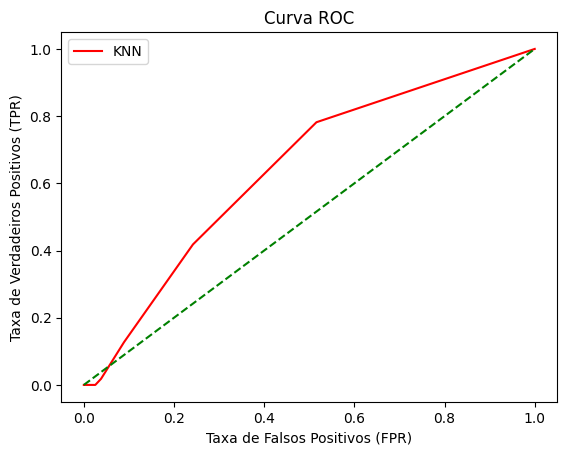

In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(x_treino,y_treino)

opiniao = KNN.predict(x_teste)

print("\nDesempenho do KNN")
print(classification_report(y_teste,opiniao))

y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

print("AUC KNN: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"red","KNN")


In [ ]:

# from sklearn.naive_bayes import GaussianNB
# NB = GaussianNB()
# NB.fit(x_treino,y_treino)
# opiniao = NB.predict(x_teste)
# print("\nDesempenho do Naive Bayes")
# print(classification_report(y_teste,opiniao))
# y_score = NB.predict_proba(x_teste)[:,1]
# fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
# print("AUC NB: ",metrics.auc(fpr,tpr))
# plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")

# from sklearn import tree
# DT = tree.DecisionTreeClassifier()
# DT.fit(x_treino,y_treino)
# opiniao = DT.predict(x_teste)
# print("\nDesempenho da Árvore de Decisão")
# print(classification_report(y_teste,opiniao))
# y_score = DT.predict_proba(x_teste)[:,1]
# fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
# print("AUC DT: ",metrics.auc(fpr,tpr))
# plot_roc_curve(fpr, tpr,"black","DT")

# from sklearn.ensemble import RandomForestClassifier
# RF = RandomForestClassifier()
# RF.fit(x_treino,y_treino)
# opiniao = RF.predict(x_teste)
# print("\nDesempenho do Random Forest")
# print(classification_report(y_teste,opiniao))
# y_score = RF.predict_proba(x_teste)[:,1]
# fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
# print("AUC RF: ",metrics.auc(fpr,tpr))
# plot_roc_curve(fpr, tpr,"yellow","RF")